In [149]:
import numpy as np
import matplotlib.pyplot as plt
import math

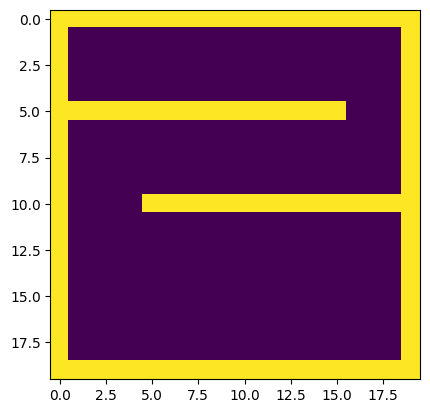

In [150]:
reality = -(np.pad(np.ones((18,18)),1)  - 1)
for ((wx1,wy1),(wx2,wy2)) in [((5,0),(5,15)),((10,5),(10,20))]:
    reality[wx1:wx2+1,wy1:wy2+1] = 1
    
plt.imshow(reality)
plt.show()

In [151]:
class queue :
    def __init__(self,n):
        self.data = np.full((n,2),0)
        self.head = 0
    def push(self, x,y):
        self.data[self.head] = [x,y]
        self.head += 1
        if self.head == len(self.data):
            self.head = 0
    
    def __iter__(self):
        return self.data[self.head:].__iter__()


In [152]:
robot_real = {
    "position": (15,15),
    "rotation": -45, #degrees
    "sonar_p": (.97, .1),
    "pos_p": (.99, .2),
    "rot_p": (1.04, .2)
}

In [160]:
def sonar(real, step=.1, angle=0):
    position = real["position"]
    r = real["rotation"] + angle
    orientation = np.array([math.cos(r), math.sin(r)])
    print(math.sqrt(orientation[0]**2 + orientation[1]**2))

    dist = 0
    while(reality[int(position[0]),int(position[1])] != 1):
        print(position)
        dist += step
        position += orientation * step

    print([int(position[0]),int(position[1])], reality[int(position[0]),int(position[1])]   )
    ret = np.random.normal(*real["sonar_p"]) * dist
    print(ret)
    return ret

In [161]:
q = queue(30)



for i in range(10):
    # r = robot_real["rotation"] + 45
    # orientation = np.array([math.cos(r), math.sin(r)])
    # dist = sonar(robot_real, angle=+45)
    # pos = robot_real["position"] + (orientation * dist)
    # print(pos)
    # q.push(*pos)
    
    # r = robot_real["rotation"] - 45
    # orientation = np.array([math.cos(r), math.sin(r)])
    # dist = sonar(robot_real, angle=-45)
    # pos = robot_real["position"] + (orientation * dist)
    # print(pos)
    # q.push(*pos)
    
    r = robot_real["rotation"]
    orientation = np.array([math.cos(r), math.sin(r)])
    dist = sonar(robot_real)
    pos = robot_real["position"] + (orientation * dist)
    print(pos)
    q.push(int(pos[0]),int(pos[1]))

   




1.0
(15, 15)
[15.0525322  14.91490965]
[15.1050644 14.8298193]
[15.1575966  14.74472894]
[15.2101288  14.65963859]
[15.26266099 14.57454824]
[15.31519319 14.48945789]
[15.36772539 14.40436753]
[15.42025759 14.31927718]
[15.47278979 14.23418683]
[15.52532199 14.14909648]
[15.57785419 14.06400612]
[15.63038639 13.97891577]
[15.68291859 13.89382542]
[15.73545078 13.80873507]
[15.78798298 13.72364471]
[15.84051518 13.63855436]
[15.89304738 13.55346401]
[15.94557958 13.46837366]
[15.99811178 13.3832833 ]
[16.05064398 13.29819295]
[16.10317618 13.2131026 ]
[16.15570838 13.12801225]
[16.20824057 13.04292189]
[16.26077277 12.95783154]
[16.31330497 12.87274119]
[16.36583717 12.78765084]
[16.41836937 12.70256048]
[16.47090157 12.61747013]
[16.52343377 12.53237978]
[16.57596597 12.44728943]
[16.62849817 12.36219907]
[16.68103036 12.27710872]
[16.73356256 12.19201837]
[16.78609476 12.10692802]
[16.83862696 12.02183766]
[16.89115916 11.93674731]
[16.94369136 11.85165696]
[16.99622356 11.76656661]
[

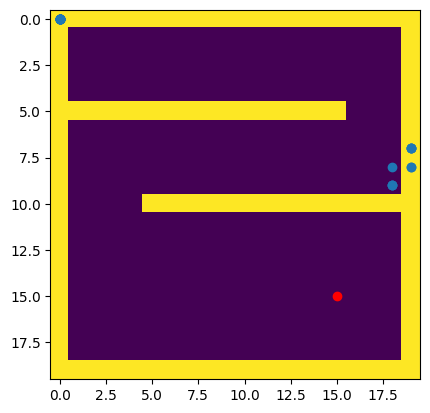

In [163]:
x,y = robot_real["position"]
plt.plot(x,y,'o', color='red')
plt.imshow(reality)

x, y = q.data.T
plt.scatter(x,y)
plt.show()